Обучить модель классификации рукописных цифр на Tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense
import pandas as pd

2.14.0


In [ ]:

def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(history["acc"],label='train accuracy')
    plt.plot(history["val_acc"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')

    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

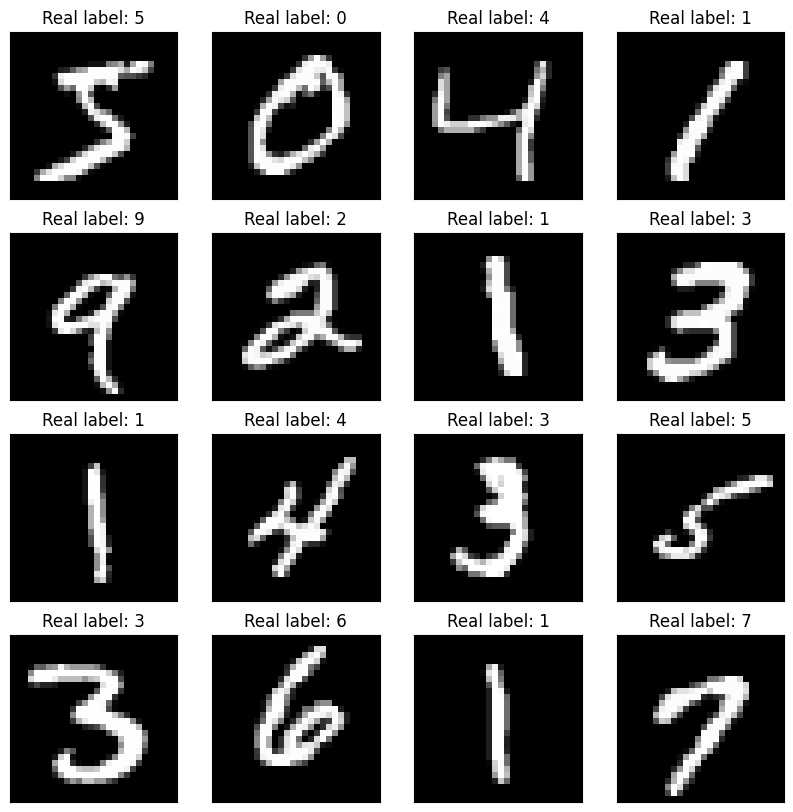

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
x_test = x_test.reshape((-1, 28*28))


In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = Path("/content/drive/My Drive/Skillbox/model_1")
path.mkdir(exist_ok=True, parents=True)
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"
cpt_path = str(path / cpt_filename)

Цель: точность на тестовой части выборки > 96%

In [ ]:
(x_train.shape, y_train.shape)

((60000, 784), (60000,))

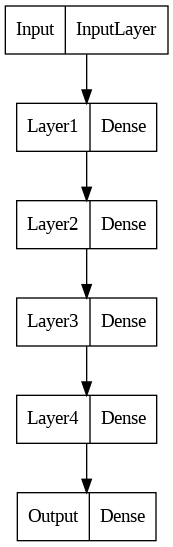

In [ ]:
input_layer = tf.keras.layers.Input(shape=(784, ), name="Input")

l1_output = Dense(200, name="Layer1")(input_layer)
l2_output = Dense(200, name="Layer2", activation='relu')(l1_output)
l3_output = Dense(200, name="Layer3", activation='relu')(l2_output)
l4_output = Dense(200, name="Layer4")(l3_output)

output = Dense(10, name="Output")(l4_output)

model = tf.keras.Model(inputs=input_layer, outputs=output)

tf.keras.utils.plot_model(model)

In [ ]:
path = Path("drive", "MyDrive", "Skillbox", "model_1")
path.mkdir(exist_ok=True)
cpt_filename = "checkpoint_best.hdf5"
cpt_path = str(path / cpt_filename)

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy", "acc"])

history = model.fit(x_train, y_train, epochs=20, verbose=2, callbacks=[checkpoint], validation_data=(x_test, y_test))

Epoch 1/20

Epoch 1: accuracy improved from -inf to 0.86787, saving model to drive/MyDrive/Skillbox/model_1/checkpoint_best.hdf5
1875/1875 - 10s - loss: 0.4782 - accuracy: 0.8679 - acc: 0.8679 - val_loss: 0.2482 - val_accuracy: 0.9290 - val_acc: 0.9290 - 10s/epoch - 5ms/step
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy improved from 0.86787 to 0.93430, saving model to drive/MyDrive/Skillbox/model_1/checkpoint_best.hdf5
1875/1875 - 9s - loss: 0.2291 - accuracy: 0.9343 - acc: 0.9343 - val_loss: 0.1869 - val_accuracy: 0.9459 - val_acc: 0.9459 - 9s/epoch - 5ms/step
Epoch 3/20

Epoch 3: accuracy improved from 0.93430 to 0.95100, saving model to drive/MyDrive/Skillbox/model_1/checkpoint_best.hdf5
1875/1875 - 8s - loss: 0.1714 - accuracy: 0.9510 - acc: 0.9510 - val_loss: 0.1523 - val_accuracy: 0.9536 - val_acc: 0.9536 - 8s/epoch - 4ms/step
Epoch 4/20

Epoch 4: accuracy improved from 0.95100 to 0.95905, saving model to drive/MyDrive/Skillbox/model_1/checkpoint_best.hdf5
1875/1875 - 10s - loss: 0.1375 - accuracy: 0.9590 - acc: 0.9590 - val_loss: 0.1252 - val_accuracy: 0.9625 - val_acc: 0.9625 - 10s/epoch - 5ms/step
Epoch 5/20

Epoch 5: accuracy improved from 0.95905 to 0.96642, saving model to drive/MyDrive/Skillbox/model_1/checkpoint_best.hdf5
1875/1875 - 8s - loss: 0.1148 - accuracy: 0.96

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,acc,val_loss,val_accuracy,val_acc
0,0.478167,0.867867,0.867867,0.248151,0.9290,0.9290
1,0.229072,0.934300,0.934300,0.186912,0.9459,0.9459
2,0.171379,0.951000,0.951000,0.152345,0.9536,0.9536
3,0.137492,0.959050,0.959050,0.125222,0.9625,0.9625
4,0.114787,0.966417,0.966417,0.109991,0.9663,0.9663


In [ ]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_accuracy" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


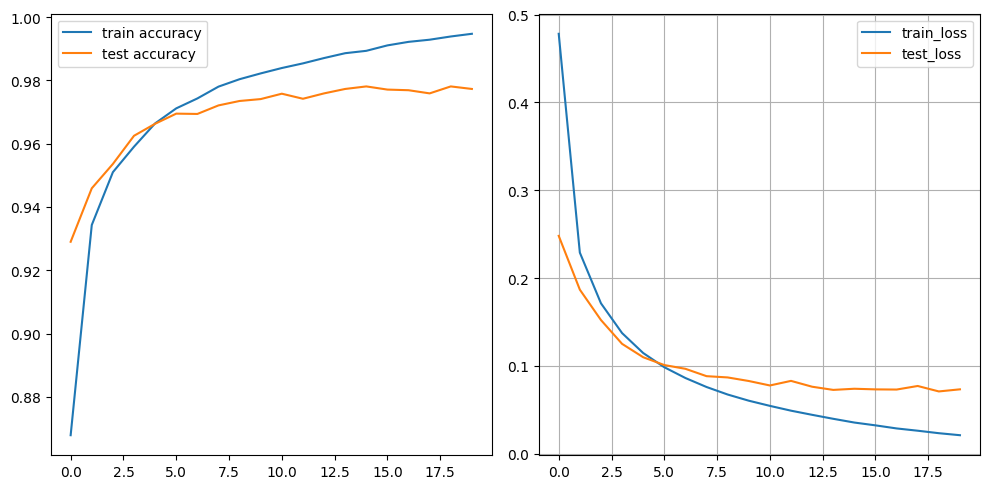

In [ ]:
show_progress(history.history)

In [ ]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc, _ = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

313/313 [==============================] - 1s 3ms/step - loss: 0.0735 - accuracy: 0.9773 - acc: 0.9773
Accuracy of restored model 97.73%


313/313 [==============================] - 1s 3ms/step


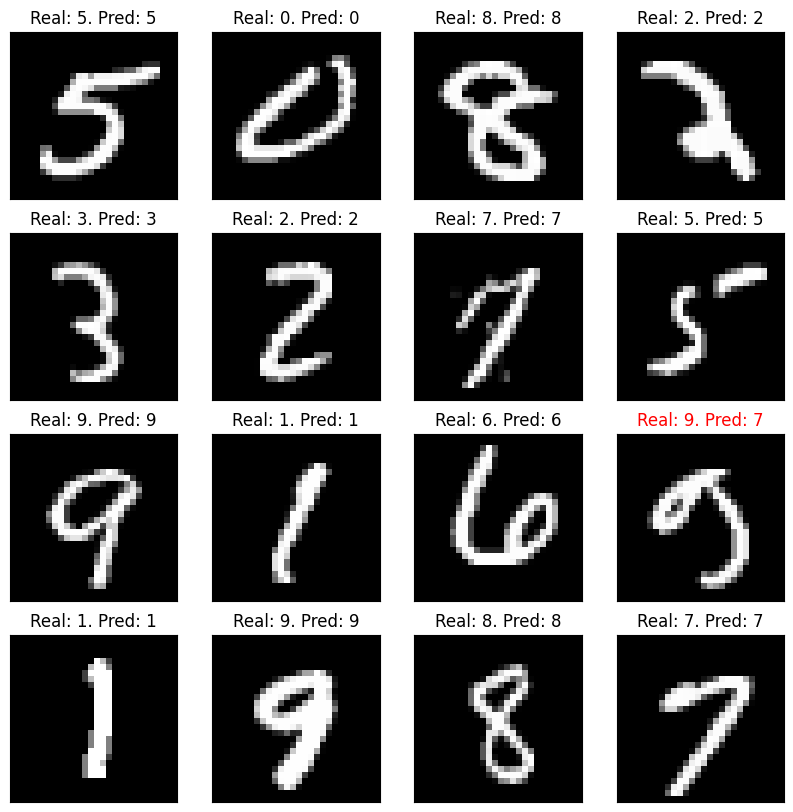

In [ ]:
predicted_labels = np.argmax(restored_model.predict(x_test), axis=1)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], predicted_labels[idxs])